## Check for Network Connectivity

This notebook demonstrates the functionality of some of the network connectivity tests for validating the a network.  You can use this notebook to do validation or write your own scripts using the available APIs

In [44]:
import os
import sys
from network_wrangler import RoadwayNetwork
%config IPCompleter.greedy=True

import logging
logger = logging.getLogger("WranglerLogger")
logger.handlers[0].stream = sys.stdout
# Set logging.INFO for less info or logging.DEBUG if you want to see everything
logger.setLevel(logging.INFO)

In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#if you need to reset variables in the notebook
%reset

## Read in RoadwayNetwork

In [46]:
STPAUL_DIR = os.path.join(os.path.dirname(os.getcwd()),'examples','stpaul')
STPAUL_SHAPE_FILE = os.path.join(STPAUL_DIR,"shape.geojson")
STPAUL_LINK_FILE = os.path.join(STPAUL_DIR,"link.json")
STPAUL_NODE_FILE = os.path.join(STPAUL_DIR,"node.geojson")

In [47]:
net = RoadwayNetwork.read(link_file= STPAUL_LINK_FILE, node_file=STPAUL_NODE_FILE, shape_file=STPAUL_SHAPE_FILE, fast=True)

2020-09-03 10:58:59, INFO: Reading from following files:
-/Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/link.json
-/Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/node.geojson
-/Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/shape.geojson.
2020-09-03 10:58:59, INFO: Reading from following files:
-/Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/link.json
-/Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/node.geojson
-/Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/shape.geojson.
2020-09-03 10:59:05, INFO: Read 66253 links from /Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/link.json
2020-09-03 10:59:05, INFO: Read 66253 links from /Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/

## Connectivity Check

The method `is_network_connected(mode = <selected_mode>)` returns a Boolean True/False if every node is reachable from every other node for a given mode.

In [48]:
net.is_network_connected(mode = "drive")

False

In [49]:
net.is_network_connected(mode = "walk")

False

In [50]:
net.is_network_connected(mode = "bike")

False

## Assessing Connectivity

If the network is not connected, you will want to learn more to make sure nothing is amiss.

 - `assess_connectivity()` returns a tuple of the network Graph and list of subgraphs as described by their nodes. 
 - `network_connection_plot()` returns an matplotlib fig, ax tuple
 


2020-09-03 10:59:41, INFO: model_node_id for disconnected networks for mode = ['bike']:
[88289, 259081, 259082, 259049, 88268, 259085, 259086, 259056, 55092, 259060, 89598]
[309784, 309785, 309787]
[335728, 335729, 335725]
2020-09-03 10:59:41, INFO: model_node_id for disconnected networks for mode = ['bike']:
[88289, 259081, 259082, 259049, 88268, 259085, 259086, 259056, 55092, 259060, 89598]
[309784, 309785, 309787]
[335728, 335729, 335725]


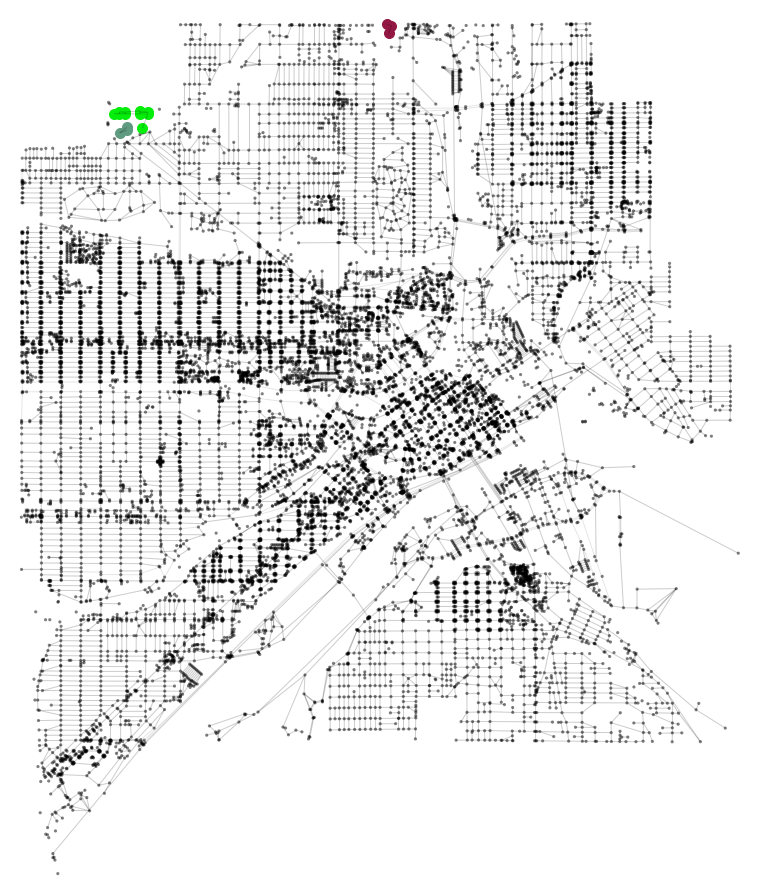

In [51]:
bike_G, disconnected_bike_nodes = net.assess_connectivity(mode=["bike"])
fig, ax = net.network_connection_plot(bike_G, disconnected_bike_nodes)
fig

2020-09-03 10:59:48, INFO: model_node_id for disconnected networks for mode = ['drive']:
[55092, 89598]
2020-09-03 10:59:48, INFO: model_node_id for disconnected networks for mode = ['drive']:
[55092, 89598]


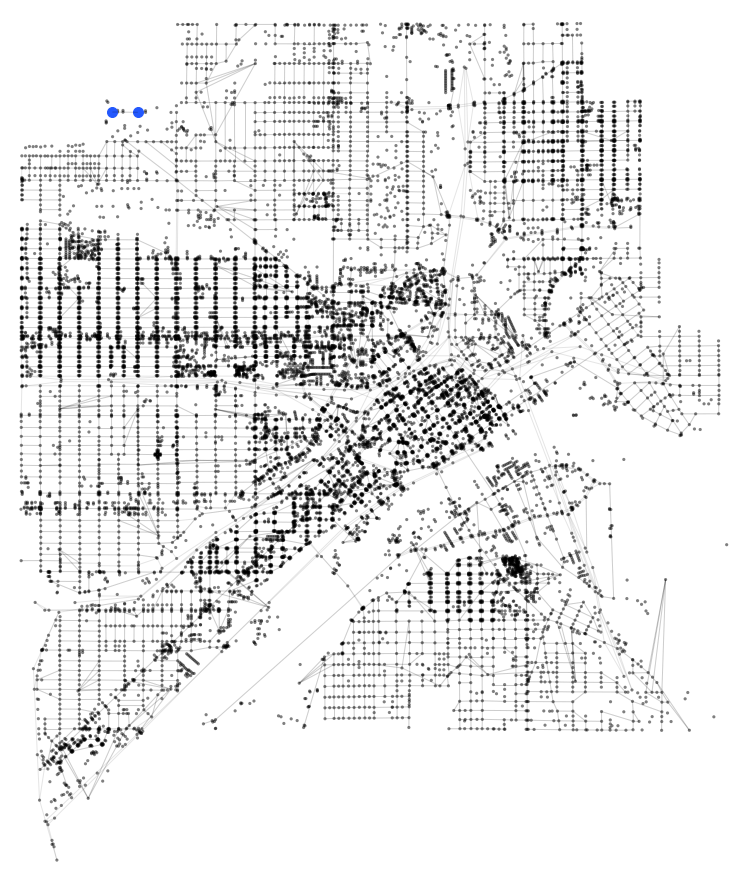

In [52]:
drive_G, disconnected_drive_nodes = net.assess_connectivity(mode=["drive"])
fig, ax = net.network_connection_plot(drive_G, disconnected_drive_nodes)
fig

2020-09-03 10:59:58, INFO: model_node_id for disconnected networks for mode = ['walk']:
[88289, 259081, 259082, 259049, 88268, 259085, 259086, 259056, 55092, 259060]
[188362, 188371, 188372, 184857, 184858]
[312951, 46902, 50903]
[309784, 309785, 309787]
[335728, 335729, 335725]
2020-09-03 10:59:58, INFO: model_node_id for disconnected networks for mode = ['walk']:
[88289, 259081, 259082, 259049, 88268, 259085, 259086, 259056, 55092, 259060]
[188362, 188371, 188372, 184857, 184858]
[312951, 46902, 50903]
[309784, 309785, 309787]
[335728, 335729, 335725]


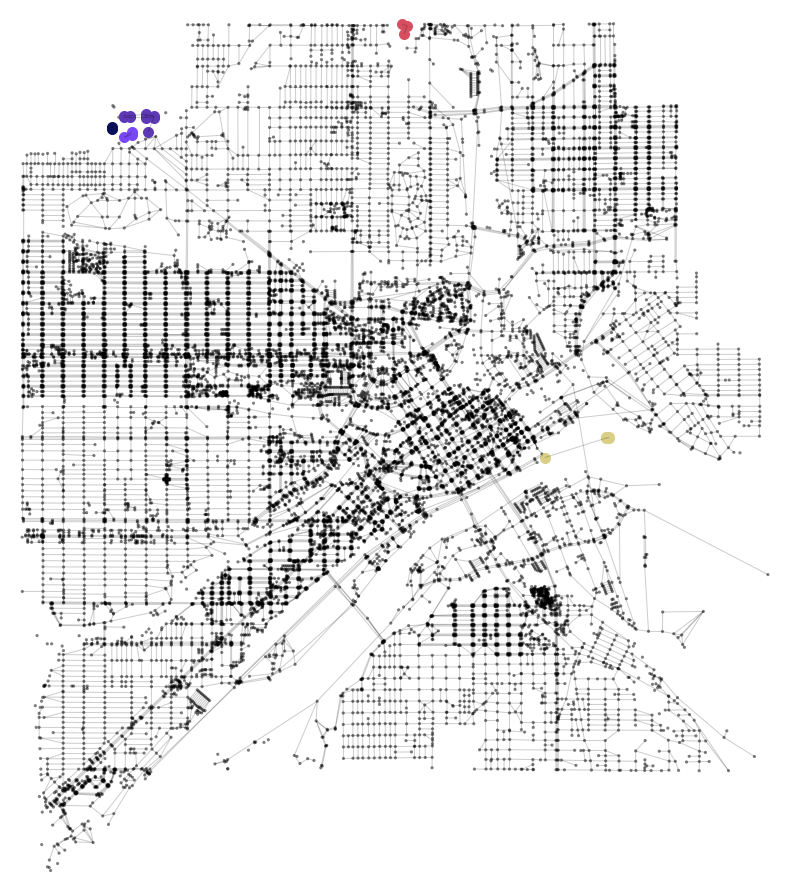

In [53]:
walk_G, disconnected_walk_nodes = net.assess_connectivity(mode=["walk"])
fig, ax = net.network_connection_plot(walk_G, disconnected_walk_nodes)
fig

**Note:**  
 - `assess_connectivity()` takes an additional boolean keyword: `ignore_end_nodes` which defaults to True.  
 - When set to False, the method will *not* ignore singleton nodes. 

In [ ]:
drive_G_2, disconnected_drive_nodes_2 = net.assess_connectivity(mode=["drive"], ignore_end_nodes = False)
fig, ax = net.network_connection_plot(drive_G_2, disconnected_drive_nodes_2)
fig

2020-09-03 11:00:08, INFO: model_node_id for disconnected networks for mode = ['drive']:
[55092, 89598]
[98845]
[137686]
[35145]
[5677]
[5690]
[28849]
[36237]
[48963]
[4777]
[1949]
[1957]
[3230]
[3276]
[3918]
[45532]
[5676]
[7158]
[7566]
[10261]
[11416]
[12521]
[12555]
[17094]
[21039]
[23188]
[28489]
[28519]
[28882]
[29092]
[30415]
[31315]
[31726]
[34850]
[36959]
[37574]
[49133]
[37582]
[37875]
[122152]
[161596]
[38121]
[38853]
[39534]
[40631]
[40956]
[41425]
[41780]
[43038]
[43518]
[43519]
[43548]
[43733]
[44022]
[44032]
[44467]
[45536]
[45988]
[46164]
[46295]
[46886]
[50903]
[46902]
[47895]
[47958]
[48545]
[49538]
[49753]
[50390]
[50674]
[50968]
[51336]
[51880]
[52546]
[52709]
[53643]
[54347]
[55094]
[55259]
[55351]
[55354]
[55971]
[56253]
[57396]
[57533]
[57836]
[58297]
[58301]
[58395]
[59325]
[59411]
[59446]
[60526]
[60815]
[61447]
[61816]
[61927]
[62003]
[62032]
[62041]
[62109]
[62111]
[62585]
[62639]
[62797]
[62812]
[63143]
[63195]
[63436]
[63567]
[63605]
[63919]
[64040]
[64916]


2020-09-03 11:00:08, INFO: model_node_id for disconnected networks for mode = ['drive']:
[55092, 89598]
[98845]
[137686]
[35145]
[5677]
[5690]
[28849]
[36237]
[48963]
[4777]
[1949]
[1957]
[3230]
[3276]
[3918]
[45532]
[5676]
[7158]
[7566]
[10261]
[11416]
[12521]
[12555]
[17094]
[21039]
[23188]
[28489]
[28519]
[28882]
[29092]
[30415]
[31315]
[31726]
[34850]
[36959]
[37574]
[49133]
[37582]
[37875]
[122152]
[161596]
[38121]
[38853]
[39534]
[40631]
[40956]
[41425]
[41780]
[43038]
[43518]
[43519]
[43548]
[43733]
[44022]
[44032]
[44467]
[45536]
[45988]
[46164]
[46295]
[46886]
[50903]
[46902]
[47895]
[47958]
[48545]
[49538]
[49753]
[50390]
[50674]
[50968]
[51336]
[51880]
[52546]
[52709]
[53643]
[54347]
[55094]
[55259]
[55351]
[55354]
[55971]
[56253]
[57396]
[57533]
[57836]
[58297]
[58301]
[58395]
[59325]
[59411]
[59446]
[60526]
[60815]
[61447]
[61816]
[61927]
[62003]
[62032]
[62041]
[62109]
[62111]
[62585]
[62639]
[62797]
[62812]
[63143]
[63195]
[63436]
[63567]
[63605]
[63919]
[64040]
[64916]
